In [236]:
from Sapsan import Sapsan
import numpy as np

pars = {'path'      : '/raid1/JHTDB/mhd/max_1024/mhd128_t@.4/fm30/',
        'dataset'   : 'mhd',
        'ttrain'    : [0],
        'axis'      : 3,
        'dim'       : 64,
        'max_dim'   : 128,
        'cube_size' : 64,
        'batch_size': 1,
        'train_fraction' : 0.5,
        'dt'        : 2.5e-3,
        'method'    : 'cnn',
        'parameters': ['u', 'du0','du1','du2'],
        'target'    : 'tn',
        'targetComp': 2,
        'name'      : 'DS'
        }
ending = '_dim128_fm30'
pars['parameters'] = [i+ending for i in pars['parameters']]
pars['target'] += ending

sps = Sapsan(pars)

#model = sps.fit()
vals = sps.data.get_features(sps.parameters, sps.parLabel, train=True)
target = sps.data.get_features(sps.target, sps.targetLabel, train=True)



Running parameters:  {'path': '/raid1/JHTDB/mhd/max_1024/mhd128_t@.4/fm30/', 'dataset': 'mhd', 'ttrain': [0], 'axis': 3, 'dim': 64, 'max_dim': 128, 'cube_size': 64, 'batch_size': 1, 'train_fraction': 0.5, 'dt': 0.0025, 'method': 'cnn', 'parameters': ['u_dim128_fm30', 'du0_dim128_fm30', 'du1_dim128_fm30', 'du2_dim128_fm30'], 'target': 'tn_dim128_fm30', 'targetComp': 2, 'name': 'DS'}
Features to use:  ['u_dim128_fm30', 'du0_dim128_fm30', 'du1_dim128_fm30', 'du2_dim128_fm30']
<class 'list'> <class 'NoneType'>
[0]
0
0.0025
Importing file: /raid1/JHTDB/mhd/max_1024/mhd128_t0.0000/fm30/u_dim128_fm30.h5
inh5 imported
HDF5 file contains the following: <KeysViewHDF5 ['u00000']>
Importing the dataset:  u00000
(128, 128, 128, 3)
(3, 64, 64, 64) 64
64 3
SHAPES (1, 262144) (3, 262144)
time spent for filtering and reducing 0.29611682891845703
Will filter:  du0_dim128_fm30
[0]
0
0.0025
Importing file: /raid1/JHTDB/mhd/max_1024/mhd128_t0.0000/fm30/du0_dim128_fm30.h5
inh5 imported
HDF5 file contains th

In [237]:
vals = np.moveaxis(vals, -1, 0)
target = np.moveaxis(target, -1, 0)

In [238]:
allvals = np.concatenate((vals, target),axis = 0)

In [239]:
print(vals.shape)
print(target.shape)
print(allvals.shape)

(12, 262144)
(3, 262144)
(15, 262144)


In [240]:
np.savetxt('u_du_tn2_dim64.txt', allvals)

In [234]:
allvals = np.loadtxt('u_du_tn2_dim64.txt')

In [235]:
print(allvals.shape)

(15, 262144)


In [219]:
import numpy as np

print(np.shape(vals))

ds = DS(64, sps)

tn = ds.run(vals)

print(np.shape(tn))

(262144, 12)
15
SHAPE (3, 64, 64, 64) (9, 64, 64, 64)
(64, 64, 64)
Applied spectral filter in: 0.2 s
(64, 64, 64)
Applied spectral filter in: 0.3 s
(64, 64, 64)
Applied spectral filter in: 0.3 s
(64, 64, 64)
Applied spectral filter in: 0.3 s
(64, 64, 64)
Applied spectral filter in: 0.3 s
(64, 64, 64)
Applied spectral filter in: 0.2 s
(64, 64, 64)
Applied spectral filter in: 0.2 s
(64, 64, 64)
Applied spectral filter in: 0.2 s
(64, 64, 64)
Applied spectral filter in: 0.2 s
(64, 64, 64)
Applied spectral filter in: 0.2 s
(64, 64, 64)
Applied spectral filter in: 0.2 s
(64, 64, 64)
Applied spectral filter in: 0.2 s
(64, 64, 64)
Applied spectral filter in: 0.2 s
(64, 64, 64)
Applied spectral filter in: 0.2 s
(64, 64, 64)
Applied spectral filter in: 0.2 s
(64, 64, 64)
Applied spectral filter in: 0.2 s
(64, 64, 64)
Applied spectral filter in: 0.2 s
(64, 64, 64)
Applied spectral filter in: 0.2 s
(64, 64, 64)
Applied spectral filter in: 0.2 s
(64, 64, 64)
Applied spectral filter in: 0.2 s
(64, 6

(3, 64, 64, 64)
(262144, 3)
(262144,) (262144,)
2
Plotting the PDF
a number of outliers 67590
a number of outliers 3142


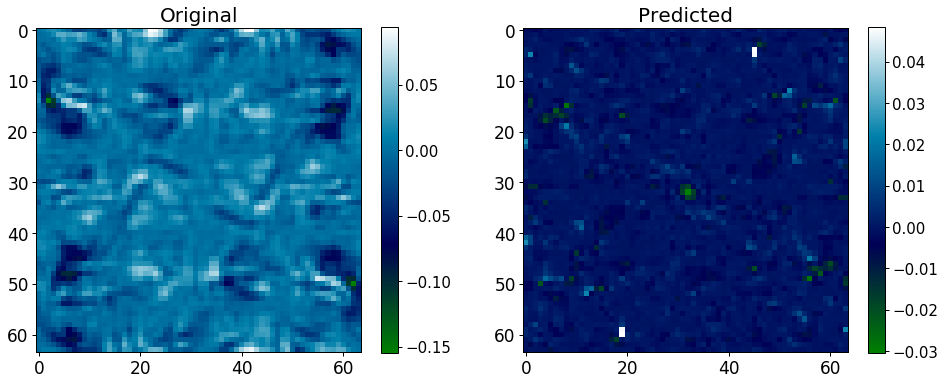

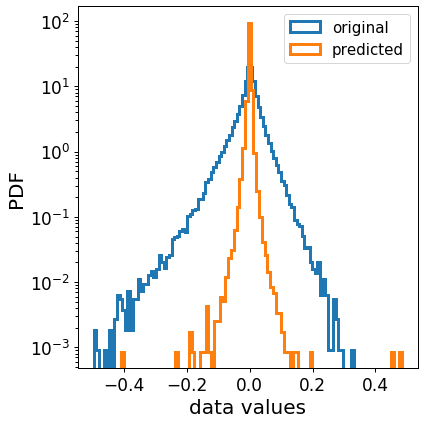

In [221]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (16, 6))
a = fig.add_subplot(121)
im = plt.imshow(target[:,2].reshape(sps.dim,sps.dim,sps.dim)[0], cmap='ocean')
plt.colorbar(im).ax.tick_params(labelsize=15)
plt.title('Original')

print(np.shape(tn[:,0]))
print(np.shape(target))

a = fig.add_subplot(122)
im = plt.imshow(tn[0,2,0], cmap='ocean')
plt.colorbar(im).ax.tick_params(labelsize=15)
plt.title('Predicted')

tar = np.reshape(target[:,1], (sps.dim**3))
new = np.reshape(tn[0,1], (sps.dim**3))

print(new.shape, tar.shape)
print(len(np.stack((tar,new))))
sps.results.pdf(np.stack((tar,new)))

In [222]:
from filters import Filters
import sys

class DS:
    def __init__(self, dim, sps):
        self.dim = dim
        self.filt = getattr(Filters, 'spectral')
            
    def run(self, vals):
        sps.fm = 15

        u = vals[:,:3]
        du = vals[:,3:]
        u = np.moveaxis(u.reshape(self.dim,self.dim,self.dim, u.shape[-1]),-1,0)
        du = np.moveaxis(du.reshape(self.dim,self.dim,self.dim, du.shape[-1]),-1,0)

        L = self.Lvar(u)
        S = self.Stn(du)
        M, Sd = self.Mvar(S)

        Cd = np.zeros((self.dim, self.dim, self.dim))

        for i in range(self.dim):
            for j in range(self.dim):
                for k in range(self.dim):

                    Cd[i,j,k] = 1/2*((sum((np.matmul(L[:,:,i,j,k],M[:,:,i,j,k])).flatten())/9)/
                                    (sum(np.matmul(M[:,:,i,j,k],M[:,:,i,j,k]).flatten())/9))

        print('shape of L', L.shape)
        print('shape of M', M.shape)
        print('shape of Sd', Sd.shape)
        print('shape of Cd', Cd.shape)
        print('shape of Cd', S.shape)
        
        tn = np.zeros((3,3,self.dim, self.dim, self.dim))
        for i in range(3):
            for j in range(3):
                tn[i,j]=-2*Cd*Sd*S[i,j]
        return tn
            
    #Dynamic Smagorinsky
    def Lvar(self, u):
        #calculates stress tensor components
        length = len(u)
        tn = np.zeros((length,length,self.dim, self.dim, self.dim))
        for i in range(3):
            for j in range(3):
                tn[i,j] = (self.filt(sps, u[i]*u[j], self.dim)-
                           self.filt(sps, u[i], self.dim)*self.filt(sps, u[j], self.dim))
        return tn

    def Stn(self, du):
        length = 3 #len(u)
        
        sps.fm = 15
        S = np.zeros((length,length,self.dim, self.dim, self.dim))
        for i in range(3):
            for j in range(3):
                S[i,j] = 1/2*(du[i]+du[j])
        return S

    def Mvar(self, S):
        length = len(S)
        M = np.zeros((length,length,self.dim, self.dim,self.dim))

        Sd = np.zeros((self.dim, self.dim, self.dim))
        for i in range(self.dim):
            for j in range(self.dim):
                for k in range(self.dim):
                    Sd[i,j,k] = np.sqrt(2)*np.linalg.norm(S[:,:,i,j,k])

        for i in range(3):
            for j in range(3):
                #>>>>>>>>1/2 is the ratio of filters!<<<<<<<<<
                M[i,j] = (self.filt(sps,Sd*S[i,j], self.dim) - 
                           (1/2)**2*self.filt(sps, Sd, self.dim)*self.filt(sps,S[i,j], self.dim))
        return M, Sd